In [1]:
import chess.pgn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pgn = open("../raw_data/fics_evals.pgn", encoding='UTF-8')

In [3]:
def game_viewer(file):
    # cycle through games
    game = chess.pgn.read_game(file)
    board = game.board()
    moves = list(game.mainline_moves())
    variations = game.mainline()
    game_log = {
        'evals':[],
        'WhiteIsComp':[],
    }
    
    #cycle through evals
    for variation in variations:
        eval = variation.comment
        eval = eval.split('[%eval ')[1].split(']')[0]
        game_log['evals'].append(float(eval))
        game_log['WhiteIsComp'].append(game.headers.get('WhiteIsComp', 'No'))
        
    # PLOT
    plt.figure(figsize=(15,5))
    plt.plot(game_log['evals'])
    zeros = np.zeros(len(game_log['evals']))
    plt.plot(zeros)
    try:
        if game.headers['WhiteIsComp'] == 'Yes':
            plt.title(f"{game.headers['White']}(C) vs {game.headers['Black']}")
    except KeyError:
        plt.title(f"{game.headers['White']} vs {game.headers['Black']}(C)")
    plt.grid()
    print(game)
#     return game_log['evals']

[Event "FICS rated blitz game"]
[Site "FICS freechess.org"]
[Date "2021.01.31"]
[Round "?"]
[White "forlat"]
[Black "Geforce"]
[Result "0-1"]
[BlackClock "0:03:00.000"]
[BlackElo "2204"]
[BlackRD "0.0"]
[ECO "A01"]
[FICSGamesDBGameNo "490373548"]
[PlyCount "40"]
[Time "23:57:00"]
[TimeControl "180+0"]
[WhiteClock "0:03:00.000"]
[WhiteElo "1970"]
[WhiteIsComp "Yes"]
[WhiteRD "0.0"]

1. b3 { [%eval 79] [%clk 0:10:00] } 1... e5 { [%eval -58] [%clk 0:10:00] } 2. Nc3 { [%eval 27] [%clk 0:10:00] } 2... Nc6 { [%eval -145] [%clk 0:10:00] } 3. e3 { [%eval 0] [%clk 0:10:00] } 3... Nf6 { [%eval -107] [%clk 0:10:00] } 4. Be2 { [%eval -20] [%clk 0:10:00] } 4... d5 { [%eval -130] [%clk 0:10:00] } 5. Bb2 { [%eval -54] [%clk 0:10:00] } 5... Bd6 { [%eval -193] [%clk 0:10:00] } 6. Nh3 { [%eval -9] [%clk 0:10:00] } 6... a6 { [%eval -227] [%clk 0:10:00] } 7. O-O { [%eval -208] [%clk 0:10:00] } 7... h5 { [%eval -303] [%clk 0:10:00] } 8. Bf3 { [%eval -157] [%clk 0:10:00] } 8... e4 { [%eval -1214] [%clk 0:10

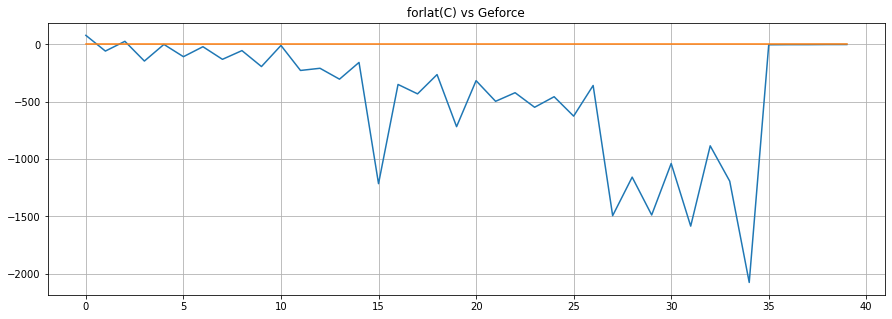

In [4]:
game_viewer(pgn)